In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

Load Dataset Olivetti

In [94]:
faces = fetch_olivetti_faces(shuffle=True, random_state=42)
X = faces.data   # (400, 4096) mỗi ảnh flatten thành vector
y = faces.target

print(X.shape)

(400, 4096)


Split Data Ratio 8/2

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test))

320 80


Mean Face Cal and Centered Data

In [96]:
mean_face = np.mean(X_train, axis=0)
X_train_centered = X_train - mean_face
X_test_centered = X_test - mean_face
print(X_train_centered)

[[-0.2561596  -0.28489137 -0.28211516 ... -0.04449919  0.05702481
  -0.03505951]
 [ 0.05375776  0.07048053  0.0567278  ...  0.01335207  0.15206614
   0.20874217]
 [-0.06194472 -0.0658831  -0.207735   ... -0.00730911  0.00330579
   0.01039505]
 ...
 [ 0.29342717  0.27295986  0.23441377 ... -0.00730911  0.02809918
   0.0186595 ]
 [ 0.4008652   0.36386898  0.31292614 ... -0.00317687 -0.00082642
   0.04758513]
 [ 0.23557597  0.17791852  0.16003361 ... -0.17259836 -0.20330578
  -0.20448099]]


Coveriance Matrix (small trick)

In [97]:
N = X_train_centered.shape[0]
C_small = np.dot(X_train_centered, X_train_centered.T) / N
print(C_small.shape)

(320, 320)


Eigen Decomposition

In [98]:
eigen_values, eigen_vectors_small = np.linalg.eigh(C_small)

idx = np.argsort(-eigen_values)
eigen_values = eigen_values[idx]
eigen_vectors_small = eigen_vectors_small[:, idx]

eigen_vectors = np.dot(X_train_centered.T, eigen_vectors_small)
eigen_vectors = eigen_vectors / np.linalg.norm(eigen_vectors, axis=0, keepdims=True)

K eigenfaces

In [99]:
k = 200
eigen_faces = eigen_vectors[:, :k]

Projection

In [ ]:
X_train_project = np.dot(X_train_centered, eigen_faces)
X_test_project = np.dot(X_test_centered, eigen_faces)

def knn(test_vector, train_project, train_labels, k=3):
    distances = np.linalg.norm(train_project - test_vector, axis=1)
    idx = np.argsort(distances)[:k]
    nearest_labels = train_labels[idx]

    # major vote
    values, counts = np.unique(nearest_labels, return_counts=True)
    return values[np.argmax(counts)]

y_preds = []
for test_vector in X_test_project:
    label = knn(test_vector, X_train_project, y_train, k=3)
    y_preds.append(label)

y_preds = np.array(y_preds)
accuracy = np.mean(y_preds == y_test)
print(f"Accuracy of Eigen + KNN Recognition: {accuracy:.2f}")

Accuracy of Eigen + KNN Recognition: 0.82


(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

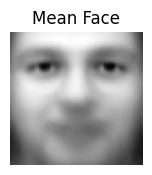

In [101]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 6, 1)
plt.imshow(mean_face.reshape(64, 64), cmap="gray")
plt.title("Mean Face")
plt.axis("off")

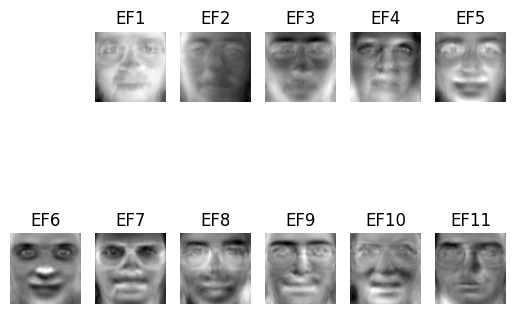

In [104]:
for i in range(1, 12):
    plt.subplot(2, 6, i+1)
    plt.imshow(eigen_faces[:, i-1].reshape(64, 64), cmap="gray")
    plt.title(f"EF{i}")
    plt.axis("off")

plt.show()